# Predicting House Sale Price in Ames Iowa

### Using Linear Regression To Predict house prices in Ames Iowa

__In this project, a thorough machine learning workflow is used to predict the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values which can be found at https://s3.amazonaws.com/dq-content/307/data_description.txt__

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

%matplotlib inline
style.use('fivethirtyeight')
pd.options.display.max_columns = 99

In [2]:
#read in the dataset

data = pd.read_csv('AmesHousing.txt', delimiter='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Before we start predicting, we need to see the distribution of the sale price column in order to know if our model is good or bad

In [3]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

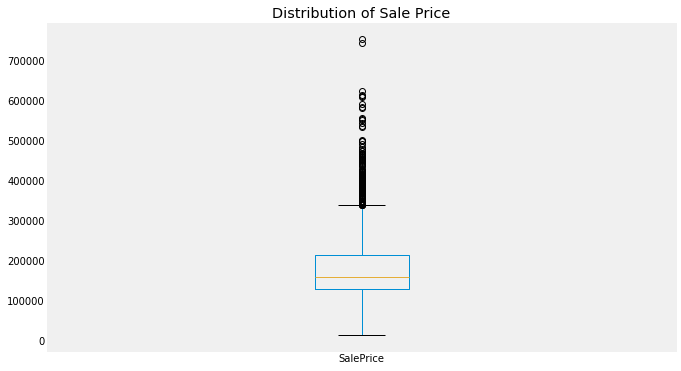

In [4]:
#Visualize the distribution

data.plot(y='SalePrice', kind='box', figsize=(10,6), title='Distribution of Sale Price')
plt.grid()
plt.show()

__The target will be to get a rmse value less than the 25th percentile based on the distribution of Sale Price above__

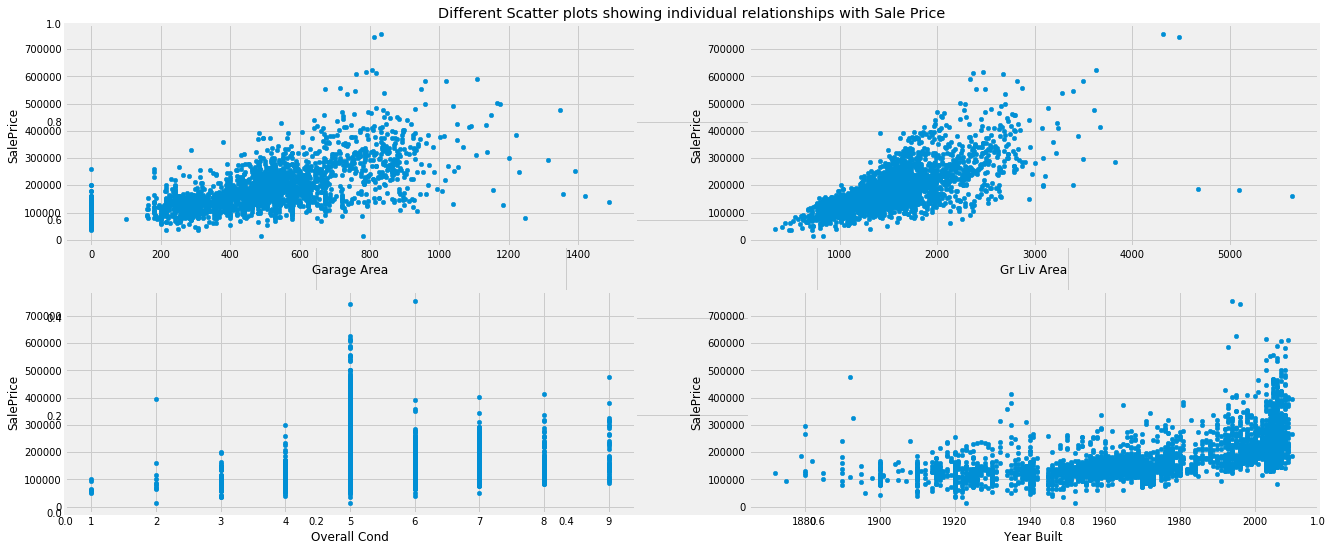

In [5]:
# Visualize correlation between target column and random features

fig = plt.figure(figsize=(20,9))

plt.title('Different Scatter plots showing individual relationships with Sale Price')


ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

data.plot(x='Garage Area', y='SalePrice', ax=ax1, kind='scatter')
data.plot(x='Gr Liv Area', y='SalePrice', ax=ax2, kind='scatter')
data.plot(x='Overall Cond', y='SalePrice', ax=ax3, kind='scatter')
data.plot(x='Year Built', y='SalePrice', ax=ax4, kind='scatter')

plt.show()

### From the visualization above, we can see some of the features have a high correlation with our target column, sale price. We will investigate more on this.

In [6]:
#top 10 features with the highest correllation with the target column, SalePrice
data.corr()['SalePrice'][:10].abs().sort_values(ascending=False)

Overall Qual      0.799262
Year Built        0.558426
Year Remod/Add    0.532974
Mas Vnr Area      0.508285
Lot Frontage      0.357318
Lot Area          0.266549
PID               0.246521
Overall Cond      0.101697
MS SubClass       0.085092
Order             0.031408
Name: SalePrice, dtype: float64

__The Overall qualtiy of the house shows a high correlation with the sale price of the house. I will use this singular feature to predict the sale price.__

In [7]:
#train the model with one feature, the Overall quality of the house

#Divide the dataset into equal parts
length = int(data.shape[0] / 2)
train = data[:length]
test = data[length:]

lr = LinearRegression()
lr.fit(train[['Overall Qual']], train['SalePrice'])
predict_test = lr.predict(test[['Overall Qual']])

mse_test = mean_squared_error(test['SalePrice'], predict_test)

rmse_test = np.sqrt(mse_test)
rmse_test

49555.27453834125

__We will look to improve upon this rmse value__

In [8]:
#training with the top two features

lr = LinearRegression()
features = ['Overall Qual','Year Built']
lr.fit(train[features], train['SalePrice'])
predict_test = lr.predict(test[features])

mse_test = mean_squared_error(test['SalePrice'], predict_test)

rmse_test = np.sqrt(mse_test)
rmse_test

49399.29349007081

# BIAS

### In order to have an optimum model, we need to select more than one feature but not every feature. I will start optimizing the selection of features to train my model based on bias

In [9]:
#Segment the data
train = data[:1460]
test = data[1460:]

#Return only numeric columns
numeric_df = train._get_numeric_data()
numeric_df.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt',
                   'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

#Count the number of null values in each column
numeric_df.isna().sum()

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

### There is need to drop all columns with null values

In [10]:
null_dist = numeric_df.isna().sum()
no_null_df = numeric_df[null_dist[null_dist == 0].index]
no_null_df.columns

Index(['Order', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [11]:
#Find the correlation of this df with saleprice
sorted_corr = no_null_df.corr()['SalePrice'].abs().sort_values(ascending=False)
sorted_corr

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Enclosed Porch     0.165873
Pool Area          0.145474
Kitchen AbvGr      0.130843
Bedroom AbvGr      0.106941
Screen Porch       0.100121
Overall Cond       0.099395
MS SubClass        0.088504
Order              0.068181
Low Qual Fin SF    0.060352
3Ssn Porch         0.038699
Misc Val           0.009903
Name: SalePrice, dtype: float64

## A correlation cut off of 30% will be used to train the model

In [12]:
strong_corr = sorted_corr[sorted_corr > 0.3]
strong_corr

SalePrice        1.000000
Overall Qual     0.804562
Gr Liv Area      0.698990
Garage Cars      0.663485
Garage Area      0.662397
1st Flr SF       0.657119
Full Bath        0.518194
Fireplaces       0.485683
TotRms AbvGrd    0.483701
Open Porch SF    0.344383
Wood Deck SF     0.319104
Name: SalePrice, dtype: float64

In [13]:
corr_cleaned_df = no_null_df[strong_corr.index]
corr_cleaned_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Full Bath,Fireplaces,TotRms AbvGrd,Open Porch SF,Wood Deck SF
0,215000,6,1656,2.0,528.0,1656,1,2,7,62,210
1,105000,5,896,1.0,730.0,896,1,0,5,0,140
2,172000,6,1329,1.0,312.0,1329,1,0,6,36,393
3,244000,7,2110,2.0,522.0,2110,2,2,8,0,0
4,189900,5,1629,2.0,482.0,928,2,1,6,34,212


In [14]:
features = corr_cleaned_df.drop(['SalePrice'], axis=1).columns
target = 'SalePrice'

test = test[strong_corr.index]
test.dropna(inplace=True)

lr = LinearRegression()
lr.fit(train[features], train[target])

predict_test = lr.predict(test[features])

mse_test = mean_squared_error(test['SalePrice'], predict_test)

rmse_test = np.sqrt(mse_test)

rmse_test

40902.16036735764

#### Significant Drop in the rmse value after optimizing the number of features used

# Remove redundant Features Using Correlation

__Some columns(features) are closely related(have high correlation) with one another. This columns contribute little to the model, so I will remove them__

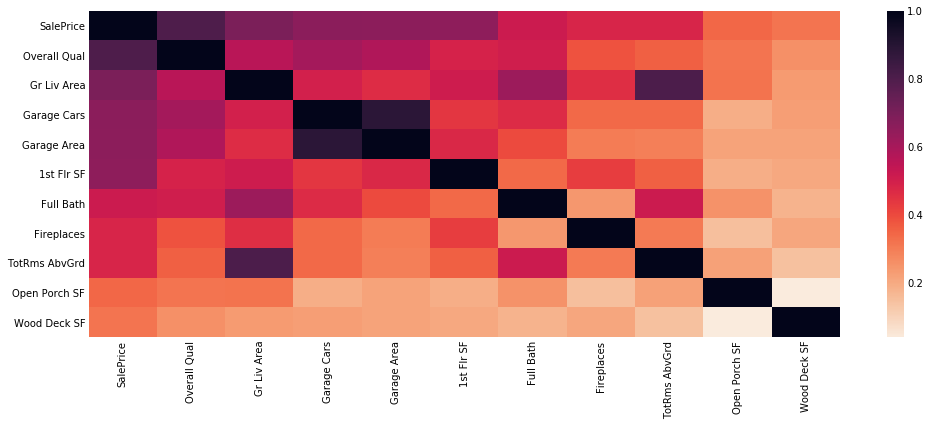

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_cleaned_df.corr(),cmap=sns.cm.rocket_r)
plt.show()

### _We see that the 'Garage Cars' and 'Garage Area' have a high correlation with each other. The same thing applies with 'TotRms AbvGrd' and 'Gr Liv Area'_

### I will drop the columns with the least correlation with sale price

In [16]:
features = corr_cleaned_df.drop(['Garage Area','SalePrice','TotRms AbvGrd'], axis=1).columns

lr.fit(train[features], train[target])

predict_test = lr.predict(test[features])

mse_test = mean_squared_error(test[target], predict_test)

rmse_test = np.sqrt(mse_test)
rmse_test

40866.235612665056

### Accounting for redundancy actually reduces the rmse value slightly

# Re-Scaling

In [17]:
corr_cleaned_df = (corr_cleaned_df - corr_cleaned_df.apply(min))/(corr_cleaned_df.apply(max) - corr_cleaned_df.apply(min))
corr_cleaned_df.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Full Bath,Fireplaces,TotRms AbvGrd,Open Porch SF,Wood Deck SF
0,0.335781,0.555556,0.404731,0.4,0.354839,0.552496,0.25,0.666667,0.4,0.113346,0.314371
1,0.153121,0.444444,0.158458,0.2,0.490591,0.225473,0.25,0.000000,0.2,0.000000,0.209581
2,0.264377,0.555556,0.298769,0.2,0.209677,0.411790,0.25,0.000000,0.3,0.065814,0.588323
3,0.383937,0.666667,0.551847,0.4,0.350806,0.747849,0.50,0.666667,0.5,0.000000,0.000000
4,0.294101,0.444444,0.395982,0.4,0.323925,0.239243,0.50,0.333333,0.3,0.062157,0.317365


## Variance

#### _I will use varaince to check which features need to be removed to reduce the rmse value_

In [18]:
corr_cleaned_df.var().sort_values()

Open Porch SF    0.013938
SalePrice        0.016941
Full Bath        0.018621
Garage Area      0.020347
Garage Cars      0.022584
Gr Liv Area      0.023078
TotRms AbvGrd    0.024136
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [19]:
#Accounting for low variance, we delete 'Open Porch SF' and 'Full Bath' which have very low variance values

features = features.drop('Open Porch SF','Full Bath')

lr.fit(train[features], train[target])

predict_test = lr.predict(test[features])

mse_test = mean_squared_error(test[target], predict_test)

rmse_test = np.sqrt(mse_test)
rmse_test

40364.092971996986

__I believe this is an optimized model that can be used to predict the selling prices of houses in Ames, Iowa.__

# Thank You